Suponga que se transmite un símbolo binario  $A \in \{ 0,1 \}$  con probabilidades a priori  $P_A(0)=q$  y  $P_A(1) =1-q$  a través de un canal BSC. La observación   $Y \in \{ 0, 1 \}$  también es binaria e igual a A con probabilidad  1-p .

1. Encuentre cualitativamente la regla de decisión MAP para el caso de  q= 0.9  y  p= 0.2 .
2. Encuentre cualitativamente la regla de decisión MAP para el caso de  q= 0.5  y  p= 0.3 .
3. A diferencia del caso ML, si suma todas las barras del histograma obtenido no van a obtener como resultado 1. Puede intuir a que se debe?
4. En cual de los casos (punto 1 o punto 2) esta regla de decisión es óptima? dicho en otras palabras, cuando esta regla de decisión produce la minima probabilidad de error?
5. Realice y adjunte la simulación Monte Carlo del problema.

# Respuestas
---
1. Si q = 0.9, entonces $P_A(0) = 0.9$ y $P_A(1) = 0.1$.
     
+ $P_{Y/A}(0/0)*P_A(0) = (1-p)*P_A(0) = 0.72$
+ $P_{Y/A}(1/0)*P_A(0) = p*P_A(0) = 0.18$
+ $P_{Y/A}(0/1)*P_A(1) = p*P_A(1) = 0.02$
+ $P_{Y/A}(1/1)*P_A(1) = (1-p)*P_A(1) = 0.08$

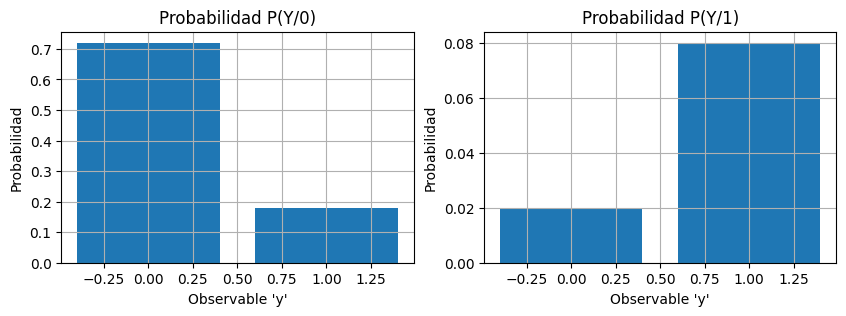

In [25]:
import matplotlib.pyplot as plt
import numpy as np

yP1 = [.72,.18]
yP2 = [.02,.08]

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.grid()
plt.xlabel("Observable 'y'")
plt.ylabel("Probabilidad")
plt.title("Probabilidad P(Y/0)")
plt.bar([0,1],yP1)

plt.subplot(1,2,2)
plt.grid()
plt.xlabel("Observable 'y'")
plt.ylabel("Probabilidad")
plt.title("Probabilidad P(Y/1)")
plt.bar([0,1],yP2,)

plt.show()

Ahora, sobreponiendo ambos gráficos

<BarContainer object of 2 artists>

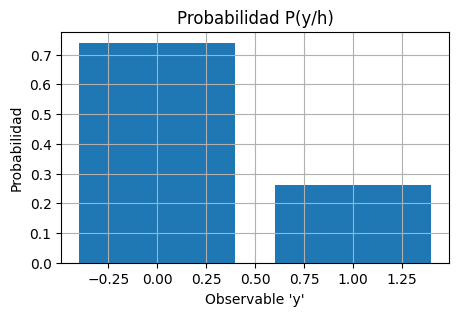

In [26]:
yPR = [(yP1[n]+yP2[n]) for n in range(len(yP1))]
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel("Probabilidad")
plt.xlabel("Observable 'y'")
plt.title("Probabilidad P(y/h)")
plt.bar([0,1],yPR)

2. Si q = 0.5, entonces $P_A(0) = 0.5$ y $P_A(1) = 0.5$.
     
+ $P_{Y/A}(0/0)*P_A(0) = (1-p)*P_A(0) = 0.4$
+ $P_{Y/A}(1/0)*P_A(0) = p*P_A(0) = 0.1$
+ $P_{Y/A}(0/1)*P_A(1) = p*P_A(1) = 0.1$
+ $P_{Y/A}(1/1)*P_A(1) = (1-p)*P_A(1) = 0.4$

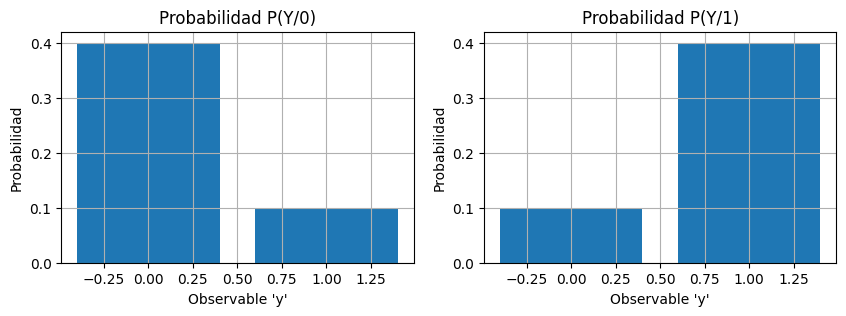

In [27]:
yP1 = [.4,.1]
yP2 = [.1,.4]

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.grid()
plt.xlabel("Observable 'y'")
plt.ylabel("Probabilidad")
plt.title("Probabilidad P(Y/0)")
plt.bar([0,1],yP1)

plt.subplot(1,2,2)
plt.grid()
plt.xlabel("Observable 'y'")
plt.ylabel("Probabilidad")
plt.title("Probabilidad P(Y/1)")
plt.bar([0,1],yP2,)

plt.show()

Ahora, sobreponiendo ambos gráficos

<BarContainer object of 2 artists>

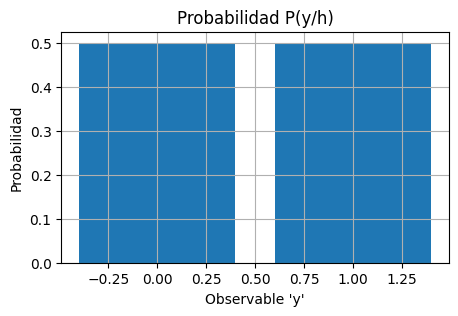

In [28]:
yPR = [(yP1[n]+yP2[n]) for n in range(len(yP1))]
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel("Probabilidad")
plt.xlabel("Observable 'y'")
plt.title("Probabilidad P(y/h)")
plt.bar([0,1],yPR)

4. Si ambas usan la regla MAP, ambas toman el valor óptimo

5. Montecarlo\
q= 0.9  y  p= 0.2

Probabilidad de error:  0.20174000000000003


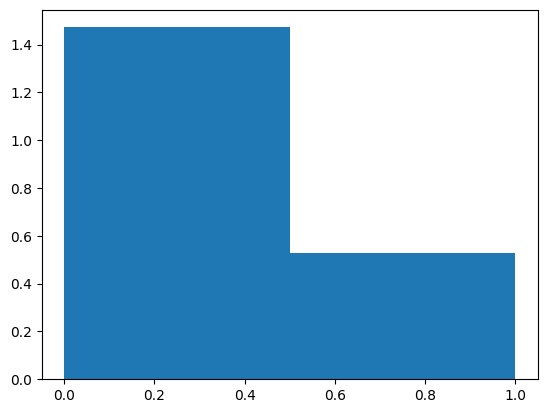

In [29]:
intentos = 50000
x = np.random.randint(1,101,intentos)
H = [1 if x[n] > 90 else 0 for n in range(len(x))]

def flip(numero,p = 20):
    if(np.random.randint(1,101) <= p):
        if(numero == 1):
            return 0
        else:
            return 1
    else:
        return numero
        

Y = [flip(H[n]) for n in range(len(H))]

plt.hist(Y,bins=2,density = True)

contador = 0
for n in range(len(Y)):
    if(Y[n] == H[n]):
        contador += 1

print("Probabilidad de error: ",1-(contador/intentos))


5. Montecarlo\
q= 0.5  y  p= 0.3

Probabilidad de error:  0.30310000000000004


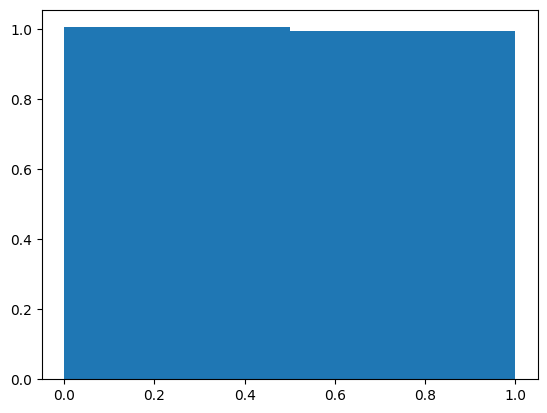

In [30]:
intentos = 50000
x = np.random.randint(1,101,intentos)
H = [1 if x[n] > 50 else 0 for n in range(len(x))]

Y = [flip(H[n],30) for n in range(len(H))]

plt.hist(Y,bins=2,density = True)

contador = 0
for n in range(len(Y)):
    if(Y[n] == H[n]):
        contador += 1

print("Probabilidad de error: ",1-(contador/intentos))